# NLP Analysis: Sentiment Analysis with VADER

In this notebook I used the VADER module to detect some sentiment on the reviews of each movie and TV show from my dataset, in order to check if there is any difference between the most common gender of them.

VADER produces four sentiment metrics from these word ratings (...). The first three - positive, neutral and negative - represent the proportion of the text that falls into those categories. (...). The final metric, the compound score, is the sum of all of the lexicon ratings which have been standardized to range between -1 and 1.

Additionally, I used the TfidfVectorizer model to check the most common words used in positive and negative reviews, for both genders.

In [48]:
import pandas as pd
import nltk

import sys
sys.path.insert(0, '/Users/gina/Documents/allWomen/Functions')
from Functions_EDA import *

## Reading the dataset

I read the dataset obtain from the notebook *NLP Analysis: Cleaning the data*.

In [49]:
dataset = pd.read_csv('datasets/final_dataset_nlp_clean.csv',index_col=0)
dataset.head()

,Title,Reviews_x,Most_Common_Gender_Cast,Most_Common_Gender_Directors
0,Money Heist,"""[4th Season Review]: [It] is like an extended...",Men,Men
1,The Blacklist,"""His name is above the title and, depending ho...",Men,Men
2,Prison Break,"""A strong cast led by Wentworth Miller (...) I...",Men,Men
3,13 Reasons Why,"""[2nd Season Review]: [It] is a frustratingly ...",Men,Men
4,Dark,"""[2nd Season Review]: 'Dark' has lofty narrati...",Men,Men


In [50]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1618 entries, 0 to 1617
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Title                         1618 non-null   object
 1   Reviews_x                     1618 non-null   object
 2   Most_Common_Gender_Cast       1618 non-null   object
 3   Most_Common_Gender_Directors  1618 non-null   object
dtypes: object(4)
memory usage: 63.2+ KB


In [51]:
dataset.columns = ['Title','Reviews','Most_Common_Gender_Cast','Most_Common_Gender_Directors']
dataset.head()

,Title,Reviews,Most_Common_Gender_Cast,Most_Common_Gender_Directors
0,Money Heist,"""[4th Season Review]: [It] is like an extended...",Men,Men
1,The Blacklist,"""His name is above the title and, depending ho...",Men,Men
2,Prison Break,"""A strong cast led by Wentworth Miller (...) I...",Men,Men
3,13 Reasons Why,"""[2nd Season Review]: [It] is a frustratingly ...",Men,Men
4,Dark,"""[2nd Season Review]: 'Dark' has lofty narrati...",Men,Men


## Exploring the data

I wanted to explore a little bit the data before appliying VADER.

In [52]:
dataset.Most_Common_Gender_Cast.value_counts()

Men      1451
Women     167
Name: Most_Common_Gender_Cast, dtype: int64

In [53]:
dataset.Most_Common_Gender_Directors.value_counts()

Men      1419
Women     199
Name: Most_Common_Gender_Directors, dtype: int64

In [54]:
# import necessary libraries
from nltk.corpus import stopwords
from wordcloud import WordCloud, ImageColorGenerator
from collections import Counter
from PIL import Image

import re
import string

In [55]:
# top words in reviews

from collections import Counter

vocab1 = Counter()
for review in dataset["Reviews"]:
    for word in review.split(' '):
        vocab1[word] += 1

vocab1.most_common(20)

[('the', 20372),
 ('of', 19374),
 ('and', 14123),
 ('a', 11760),
 ('(...)', 11113),
 ('is', 10332),
 ('to', 8818),
 ('that', 6321),
 ('","', 5634),
 ('in', 5563),
 ('(out', 5257),
 ('it', 5194),
 ('Rating:', 4911),
 ('with', 3939),
 (',', 3340),
 ('but', 3193),
 ('5)', 3048),
 ('', 2948),
 ('not', 2829),
 ('its', 2784)]

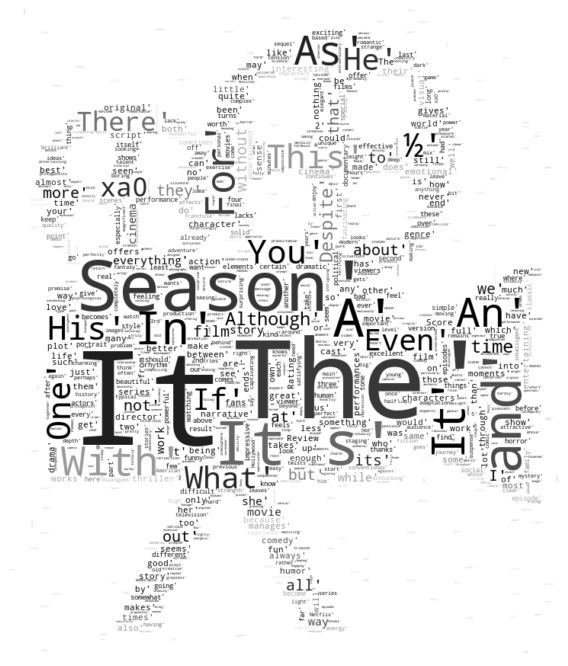

In [56]:
# Generate a word cloud image
mask = np.array(Image.open("/Users/gina/Documents/allWomen/Final project/imgbin-video-cameras-silhouette-print-a-film-PGachFdKbjUTKxJyZRZ3GRBXS.jpg"))
wordcloud_raw_data = WordCloud(stopwords=None, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(str(vocab1.most_common(1000)))

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[12,12])
plt.imshow(wordcloud_raw_data.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
#plt.title('\nReviews\n', fontsize=18)

# store to file
plt.savefig("/Users/gina/Documents/allWomen/Final project/images/Sentiment Analysis/no stopwords data/fig1.png", format="png")

plt.show()

## Applying VADER

From here, I applied VADER module to obtain the positive, negative and neutral score from all the reviews.

Before that, I cleaned the text trying to avoid some common words that doesn't give any kind of information to the analysis (which are called *stop words*).

In [57]:
# load the SentimentIntensityAnalyser object in vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

In [58]:
# getting only the negative score
def negative_score(text):
    negative_value = analyzer.polarity_scores(text)['neg']
    return negative_value

# getting only the neutral score
def neutral_score(text):
    neutral_value = analyzer.polarity_scores(text)['neu']
    return neutral_value

# getting only the positive score
def positive_score(text):
    positive_value = analyzer.polarity_scores(text)['pos']
    return positive_value

# getting only the compound score
def compound_score(text):
    compound_value = analyzer.polarity_scores(text)['compound']
    return compound_value

In [59]:
stopWords = nltk.corpus.stopwords.words('english')
newStopWords = ['Rating','film','Film','season', 'Season','xa0','story','Story','series', 
                'Series', 'review','movie','cinema','Review','Movie','Cinema','episode',
               'Episode','Cast','cast','make','makes']
stopWords.extend(newStopWords)

In [60]:
def clean_text(review):
    words = review.split()
    words = [word.lower() for word in words if word.isalpha()]
    words = [word for word in words if not word in stopWords]
    return (" ").join(words)

In [61]:
dataset["Clean_Reviews"] = dataset["Reviews"].map(lambda x: clean_text(x))
dataset.head()

,Title,Reviews,Most_Common_Gender_Cast,Most_Common_Gender_Directors,Clean_Reviews
0,Money Heist,"""[4th Season Review]: [It] is like an extended...",Men,Men,like extended heist except gets pacier every p...
1,The Blacklist,"""His name is above the title and, depending ho...",Men,Men,name title depending feel james may become fav...
2,Prison Break,"""A strong cast led by Wentworth Miller (...) I...",Men,Men,strong led wentworth miller needs begin peelin...
3,13 Reasons Why,"""[2nd Season Review]: [It] is a frustratingly ...",Men,Men,frustratingly unnecessary mess execution frequ...
4,Dark,"""[2nd Season Review]: 'Dark' has lofty narrati...",Men,Men,lofty narrative continues nail every twist tur...


In [62]:
# top words in reviews

from collections import Counter

vocab = Counter()
for review in dataset["Clean_Reviews"]:
    for word in review.split(' '):
        vocab[word] += 1

vocab.most_common(20)

[('one', 1032),
 ('like', 888),
 ('good', 863),
 ('much', 693),
 ('best', 685),
 ('without', 639),
 ('great', 610),
 ('new', 576),
 ('first', 574),
 ('characters', 565),
 ('also', 563),
 ('even', 558),
 ('work', 549),
 ('well', 535),
 ('time', 522),
 ('although', 516),
 ('many', 478),
 ('something', 468),
 ('action', 467),
 ('comedy', 465)]

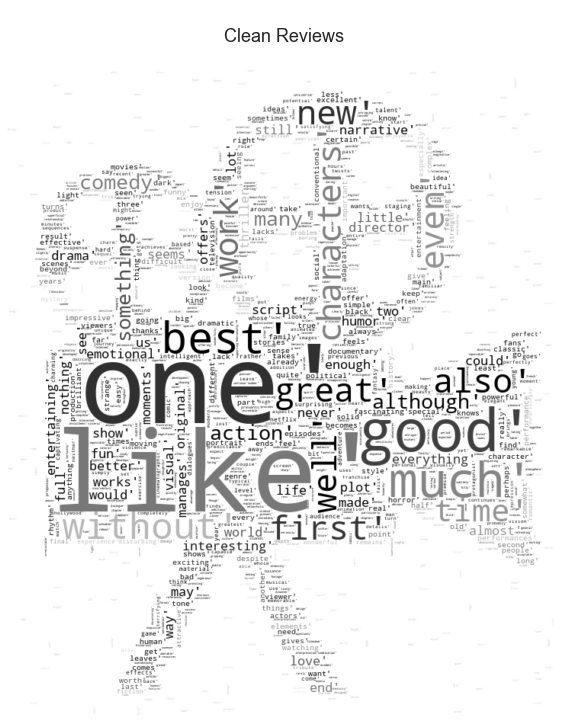

In [63]:
# Generate a word cloud image
mask = np.array(Image.open("/Users/gina/Documents/allWomen/Final project/imgbin-video-cameras-silhouette-print-a-film-PGachFdKbjUTKxJyZRZ3GRBXS.jpg"))
wordcloud_clean_data = WordCloud(stopwords=None, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(str(vocab.most_common(1000)))

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[12,12])
plt.imshow(wordcloud_clean_data.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.title('\nClean Reviews\n', fontsize=18)

# store to file
plt.savefig("/Users/gina/Documents/allWomen/Final project/images/Sentiment Analysis/no stopwords data/fig2.png", format="png")

plt.show()

In [64]:
%%time

dataset['Neg_Sentiment'] = dataset['Clean_Reviews'].apply(negative_score)
dataset['Neu_Sentiment'] = dataset['Clean_Reviews'].apply(neutral_score)
dataset['Pos_Sentiment'] = dataset['Clean_Reviews'].apply(positive_score)
dataset['Sentiment_Compound'] = dataset['Clean_Reviews'].apply(compound_score)

CPU times: user 22.5 s, sys: 37.4 ms, total: 22.6 s
Wall time: 22.6 s


In [65]:
dataset.head()

,Title,Reviews,Most_Common_Gender_Cast,Most_Common_Gender_Directors,Clean_Reviews,Neg_Sentiment,Neu_Sentiment,Pos_Sentiment,Sentiment_Compound
0,Money Heist,"""[4th Season Review]: [It] is like an extended...",Men,Men,like extended heist except gets pacier every p...,0.074,0.531,0.394,0.9819
1,The Blacklist,"""His name is above the title and, depending ho...",Men,Men,name title depending feel james may become fav...,0.022,0.688,0.289,0.9400
2,Prison Break,"""A strong cast led by Wentworth Miller (...) I...",Men,Men,strong led wentworth miller needs begin peelin...,0.112,0.641,0.247,0.8447
3,13 Reasons Why,"""[2nd Season Review]: [It] is a frustratingly ...",Men,Men,frustratingly unnecessary mess execution frequ...,0.183,0.573,0.244,0.3182
4,Dark,"""[2nd Season Review]: 'Dark' has lofty narrati...",Men,Men,lofty narrative continues nail every twist tur...,0.105,0.627,0.268,0.9703


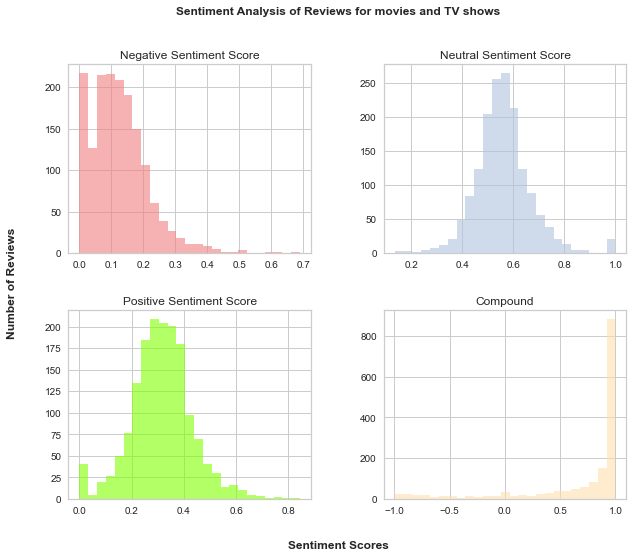

In [66]:
# all scores in 4 histograms
fig, axes = plt.subplots(2, 2, figsize=(10,8))

# plot all 4 histograms
dataset.hist('Neg_Sentiment', bins=25, ax=axes[0,0], color='lightcoral', alpha=0.6)
axes[0,0].set_title('Negative Sentiment Score')
dataset.hist('Neu_Sentiment', bins=25, ax=axes[0,1], color='lightsteelblue', alpha=0.6)
axes[0,1].set_title('Neutral Sentiment Score')
dataset.hist('Pos_Sentiment', bins=25, ax=axes[1,0], color='chartreuse', alpha=0.6)
axes[1,0].set_title('Positive Sentiment Score')
dataset.hist('Sentiment_Compound', bins=25, ax=axes[1,1], color='navajowhite', alpha=0.6)
axes[1,1].set_title('Compound')

# plot common x- and y-label
fig.text(0.5, 0.04, 'Sentiment Scores',  fontweight='bold', ha='center')
fig.text(0.04, 0.5, 'Number of Reviews', fontweight='bold', va='center', rotation='vertical')

# plot title
plt.suptitle('Sentiment Analysis of Reviews for movies and TV shows\n\n', fontsize=12, fontweight='bold');

In [67]:
percentiles = dataset.Sentiment_Compound.describe(percentiles=[.05, .1, .2, .3, .4, .5, .6, .7, .8, .9])
percentiles

count    1618.000000
mean        0.683219
std         0.511055
min        -0.995200
5%         -0.681640
10%        -0.128000
20%         0.463040
30%         0.744810
40%         0.887220
50%         0.941800
60%         0.967620
70%         0.982500
80%         0.990300
90%         0.996100
max         0.999800
Name: Sentiment_Compound, dtype: float64

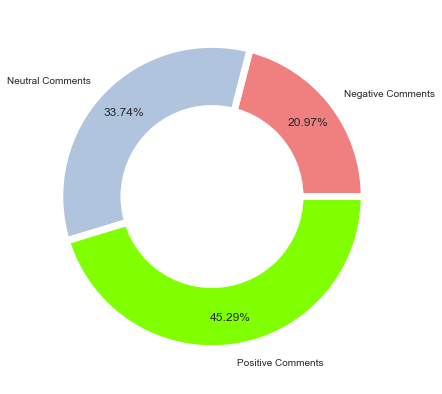

In [68]:
# comparing negative and positive comments

# assign the data
neg = percentiles['20%']
mid = percentiles['30%']
pos = percentiles['max']
names = ['Negative Comments', 'Neutral Comments','Positive Comments']

size = [neg, mid, pos]

# call a pie chart
plt.pie(size, labels=names, colors=['lightcoral', 'lightsteelblue', 'chartreuse'], 
        autopct='%.2f%%', pctdistance=0.8,
        wedgeprops={'linewidth':7, 'edgecolor':'white' })

# create circle for the center of the plot to make the pie look like a donut
my_circle = plt.Circle((0,0), 0.6, color='white')

# plot the donut chart
fig = plt.gcf()
fig.set_size_inches(7,7)
fig.gca().add_artist(my_circle)
plt.show()

In [69]:
# full dataframe with POSITIVE comments
df_pos = dataset.loc[dataset.Sentiment_Compound >= 0.90]

# only corpus of POSITIVE comments
pos_reviews = df_pos['Clean_Reviews'].tolist()

In [70]:
# full dataframe with NEGATIVE comments
df_neg = dataset.loc[dataset.Sentiment_Compound < 0.0]

# only corpus of NEGATIVE comments
neg_reviews = df_neg['Clean_Reviews'].tolist()

In [71]:
df_pos['Text_Length'] = df_pos['Clean_Reviews'].apply(len)
df_neg['Text_Length'] = df_neg['Clean_Reviews'].apply(len)

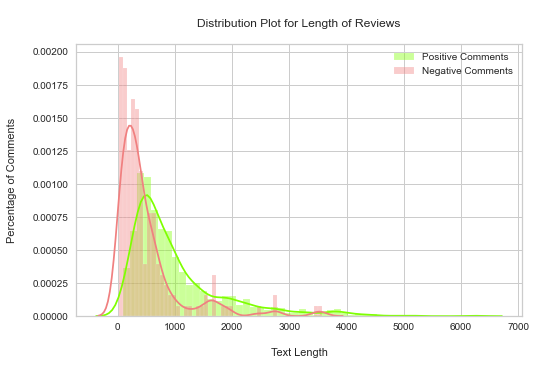

In [72]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))

sns.distplot(df_pos['Text_Length'], kde=True, bins=50, color='chartreuse')
sns.distplot(df_neg['Text_Length'], kde=True, bins=50, color='lightcoral')

plt.title('\nDistribution Plot for Length of Reviews\n')
plt.legend(['Positive Comments', 'Negative Comments'])
plt.xlabel('\nText Length')
plt.ylabel('Percentage of Comments\n');

The mode for the text length of positive comments can be found more to the right than for the negative comments, which means most of the positive comments are longer than most of the negative comments.

In [73]:
# top words in reviews

from collections import Counter

vocab2 = Counter()
for review in df_pos["Clean_Reviews"]:
    for word in review.split(' '):
        vocab2[word] += 1

vocab2.most_common(20)

[('one', 830),
 ('like', 710),
 ('good', 704),
 ('best', 603),
 ('great', 548),
 ('much', 537),
 ('without', 498),
 ('new', 474),
 ('first', 449),
 ('work', 445),
 ('also', 444),
 ('even', 442),
 ('well', 437),
 ('characters', 430),
 ('time', 425),
 ('although', 420),
 ('comedy', 397),
 ('entertaining', 396),
 ('interesting', 374),
 ('action', 362)]

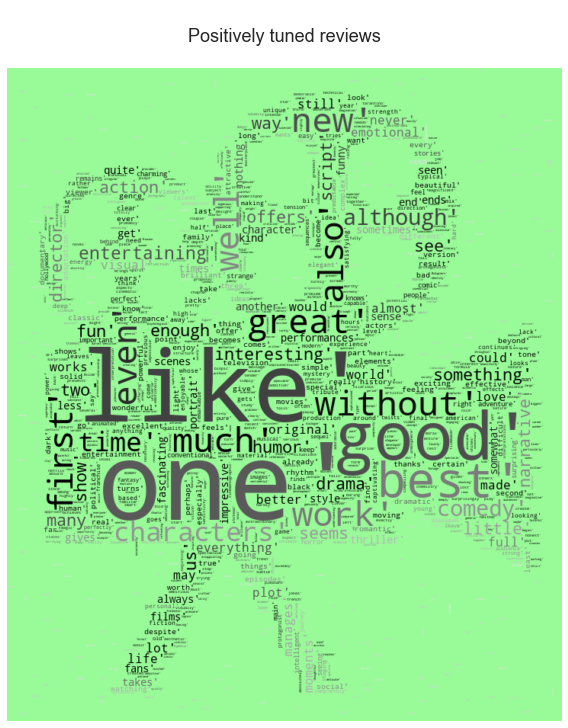

In [74]:
# Generate a word cloud image
mask = np.array(Image.open("/Users/gina/Documents/allWomen/Final project/imgbin-video-cameras-silhouette-print-a-film-PGachFdKbjUTKxJyZRZ3GRBXS.jpg"))
wordcloud_clean_data = WordCloud(stopwords=None, background_color="palegreen", mode="RGBA", max_words=1000, mask=mask).generate(str(vocab2.most_common(1000)))

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[12,12])
plt.imshow(wordcloud_clean_data.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.title('\nPositively tuned reviews\n', fontsize=18)

# store to file
plt.savefig("/Users/gina/Documents/allWomen/Final project/images/Sentiment Analysis/no stopwords data/fig3.png", format="png")

plt.show()

In [75]:
# frequency distribution

# importing libraries
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.text.freqdist import FreqDistVisualizer
from yellowbrick.style import set_palette

<bound method Visualizer.poof of FrequencyVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fbdcd0dc550>,
                    color=None,
                    features=['aa', 'aardman', 'aardmanian', 'aaron', 'abandon',
                              'abandoned', 'abandoning', 'abandons', 'abba',
                              'abbott', 'abc', 'abducted', 'abella',
                              'abercrombie', 'abhorrent', 'abide', 'abiding',
                              'abilities', 'ability', 'abjection', 'able',
                              'abominable', 'abounding', 'abounds',
                              'abracadabrantes', 'abrupt', 'abruptly',
                              'abruptness', 'absence', 'absent', ...],
                    n=None, orient='h')>

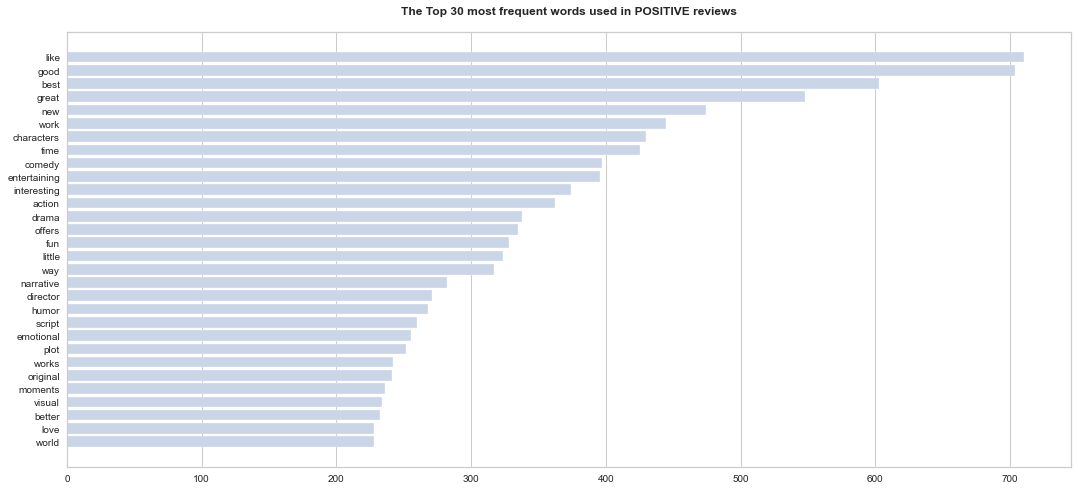

In [76]:
# vectorizing text
vectorizer = CountVectorizer(stop_words='english')
docs = vectorizer.fit_transform(pos_reviews)
features = vectorizer.get_feature_names()

# preparing the plot
set_palette('pastel')
plt.figure(figsize=(18,8))
plt.title('The Top 30 most frequent words used in POSITIVE reviews\n', fontweight='bold')

# instantiating and fitting the FreqDistVisualizer, plotting the top 30 most frequent terms
visualizer = FreqDistVisualizer(features=features, n=30)
visualizer.fit(docs)
visualizer.poof

In [77]:
# top words in reviews

from collections import Counter

vocab3 = Counter()
for review in df_neg["Clean_Reviews"]:
    for word in review.split(' '):
        vocab3[word] += 1

vocab3.most_common(20)

[('much', 59),
 ('one', 59),
 ('horror', 56),
 ('first', 49),
 ('like', 48),
 ('even', 46),
 ('little', 45),
 ('time', 40),
 ('characters', 40),
 ('good', 39),
 ('although', 39),
 ('also', 38),
 ('bad', 38),
 ('us', 37),
 ('without', 37),
 ('work', 37),
 ('action', 36),
 ('many', 33),
 ('new', 32),
 ('director', 32)]

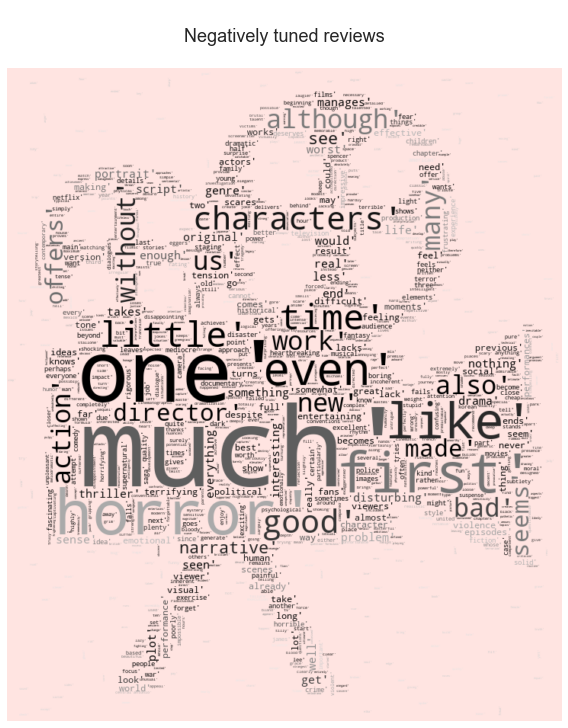

In [78]:
# Generate a word cloud image
mask = np.array(Image.open("/Users/gina/Documents/allWomen/Final project/imgbin-video-cameras-silhouette-print-a-film-PGachFdKbjUTKxJyZRZ3GRBXS.jpg"))
wordcloud_clean_data = WordCloud(stopwords=None, background_color="mistyrose", mode="RGBA", max_words=1000, mask=mask).generate(str(vocab3.most_common(1000)))

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[12,12])
plt.imshow(wordcloud_clean_data.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.title('\nNegatively tuned reviews\n', fontsize=18)

# store to file
plt.savefig("/Users/gina/Documents/allWomen/Final project/images/Sentiment Analysis/no stopwords data/fig4.png", format="png")

plt.show()

<bound method Visualizer.poof of FrequencyVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fbdc1849c90>,
                    color=None,
                    features=['abandon', 'abhorrent', 'abilities', 'ability',
                              'abject', 'able', 'abortion', 'abound',
                              'abrasive', 'abrupt', 'absent', 'absolute',
                              'absolutely', 'absorbent', 'absorbing',
                              'abstracted', 'absurd', 'abundant', 'abuse',
                              'abused', 'abuses', 'abusing', 'abusive', 'abyss',
                              'accessible', 'acclaimed', 'accompaniment',
                              'accompany', 'accomplished', 'accomplishes', ...],
                    n=None, orient='h')>

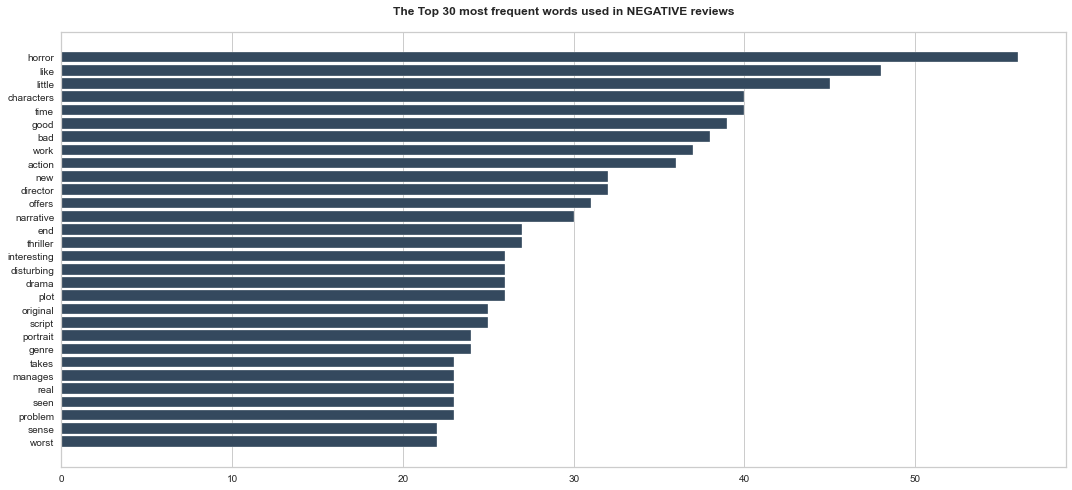

In [79]:
# vectorizing text
vectorizer = CountVectorizer(stop_words='english')
docs = vectorizer.fit_transform(neg_reviews)
features = vectorizer.get_feature_names()

# preparing the plot
set_palette('flatui')
plt.figure(figsize=(18,8))
plt.title('The Top 30 most frequent words used in NEGATIVE reviews\n', fontweight='bold')

# instantiating and fitting the FreqDistVisualizer, plotting the top 30 most frequent terms
visualizer = FreqDistVisualizer(features=features, n=30)
visualizer.fit(docs)
visualizer.poof

In [80]:
df_pos.Most_Common_Gender_Cast.value_counts()

Men      854
Women     97
Name: Most_Common_Gender_Cast, dtype: int64

In [81]:
df_pos.Most_Common_Gender_Directors.value_counts()

Men      823
Women    128
Name: Most_Common_Gender_Directors, dtype: int64

In [82]:
df_neg.Most_Common_Gender_Cast.value_counts()

Men      165
Women     15
Name: Most_Common_Gender_Cast, dtype: int64

In [83]:
df_neg.Most_Common_Gender_Directors.value_counts()

Men      157
Women     23
Name: Most_Common_Gender_Directors, dtype: int64

In [85]:
import plotly.graph_objects as go

trace_1 = go.Bar(
    x=df_neg.Most_Common_Gender_Cast.value_counts().keys(),
    y=df_neg.Most_Common_Gender_Cast.value_counts().values,
    opacity = 0.6,
    name = 'Negative reviews',
    marker_color = 'red',
    text = df_neg.Most_Common_Gender_Cast.value_counts().values,
    texttemplate='%{text:.2s}',
    textposition='outside'
)

trace_2 = go.Bar(
    x=df_pos.Most_Common_Gender_Cast.value_counts().keys(),
    y=df_pos.Most_Common_Gender_Cast.value_counts().values,
    opacity = 0.6,
    name = 'Positive reviews',
    marker_color = 'green',
    text = df_pos.Most_Common_Gender_Cast.value_counts().values,
    texttemplate='%{text:.2s}',
    textposition='outside'
)

traces = [trace_2, trace_1]
layout = go.Layout(barmode='stack',
                   title='Most common gender for CAST in positive and negative reviews',
                   yaxis=dict( title='Count'),
                   xaxis=dict( title='Gender'),
                   paper_bgcolor='whitesmoke',
                   #xaxis_tickangle=-45,
                   legend=dict(
                    x=0.80,
                    y=1.15,
                    bgcolor='rgba(255, 255, 255, 0)',
                    bordercolor='rgba(255, 255, 255, 0)'
                    ),
                   uniformtext_minsize=1, 
                   uniformtext_mode='show',
)

fig1 = go.Figure(data=traces, layout=layout)
iplot(fig1)

#https://plotly.com/python/static-image-export/
#fig1.write_image("/Users/gina/Documents/allWomen/Final project/images/Sentiment Analysis/fig1.png")
#https://plotly.com/python/interactive-html-export/
fig1.write_html("/Users/gina/Documents/allWomen/Final project/images/Sentiment Analysis/no stopwords data/fig5.html")

In [86]:
import plotly.graph_objects as go

trace_1 = go.Bar(
    x=df_neg.Most_Common_Gender_Directors.value_counts().keys(),
    y=df_neg.Most_Common_Gender_Directors.value_counts().values,
    opacity = 0.6,
    name = 'Negative reviews',
    marker_color = 'red',
    text = df_neg.Most_Common_Gender_Directors.value_counts().values,
    texttemplate='%{text:.2s}',
    textposition='outside'
)

trace_2 = go.Bar(
    x=df_pos.Most_Common_Gender_Directors.value_counts().keys(),
    y=df_pos.Most_Common_Gender_Directors.value_counts().values,
    opacity = 0.6,
    name = 'Positive reviews',
    marker_color = 'green',
    text = df_pos.Most_Common_Gender_Directors.value_counts().values,
    texttemplate='%{text:.2s}',
    textposition='outside'
)

traces = [trace_2, trace_1]
layout = go.Layout(barmode='stack',
                   title='Most common gender for DIRECTORS in positive and negative reviews',
                   yaxis=dict( title='Count'),
                   xaxis=dict( title='Gender'),
                   paper_bgcolor='whitesmoke',
                   #xaxis_tickangle=-45,
                   legend=dict(
                    x=0.80,
                    y=1.15,
                    bgcolor='rgba(255, 255, 255, 0)',
                    bordercolor='rgba(255, 255, 255, 0)'
                    ),
                   uniformtext_minsize=1, 
                   uniformtext_mode='show',
)

fig1 = go.Figure(data=traces, layout=layout)
iplot(fig1)

#https://plotly.com/python/static-image-export/
#fig1.write_image("/Users/gina/Documents/allWomen/Final project/images/Sentiment Analysis/fig2.png")
#https://plotly.com/python/interactive-html-export/
fig1.write_html("/Users/gina/Documents/allWomen/Final project/images/Sentiment Analysis/no stopwords data/fig6.html")

In [87]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

labels1 = ['Negative','Positive']
values1 = [df_neg.Most_Common_Gender_Cast.value_counts().values[0],
          df_pos.Most_Common_Gender_Cast.value_counts().values[0]]

labels2 = ['Negative','Positive']
values2 = [df_neg.Most_Common_Gender_Cast.value_counts().values[1],
          df_pos.Most_Common_Gender_Cast.value_counts().values[1]]

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels1, values=values1, name="Most_Common_Gender_Cast",
                    marker_colors=['red','green'], pull=[0, 0.2],
                    opacity=0.90),
              1, 1)
fig.add_trace(go.Pie(labels=labels2, values=values2, name="Most_Common_Gender_Cast",
                    marker_colors=['red','green'], pull=[0, 0.2],
                    opacity=0.90),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name",
                 textposition='inside', textinfo='percent+label', textfont_size=11)

fig.update_layout(
    title={
                    'text': "Positive and negative reviews for CAST by gender",
                    'y':0.9,
                    'x':0.5,
                    'xanchor': 'center',
                    'yanchor': 'top'},
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Men', x=0.21, y=0.45, font_size=15, showarrow=False),
                 dict(text='Women', x=0.85, y=0.45, font_size=15, showarrow=False)],
    paper_bgcolor='white',
    legend=dict(x=0.45,
                y=1,
                bgcolor='rgba(255, 255, 255, 0)',
                bordercolor='rgba(255, 255, 255, 0)'
                ))
fig.show()

#https://plotly.com/python/static-image-export/
#fig.write_image("/Users/gina/Documents/allWomen/Final project/images/Sentiment Analysis/fig3.png")
#https://plotly.com/python/interactive-html-export/
fig.write_html("/Users/gina/Documents/allWomen/Final project/images/Sentiment Analysis/no stopwords data/fig7.html")
fig.write_image("/Users/gina/Documents/allWomen/Final project/images/Sentiment Analysis/no stopwords data/fig7.svg")

In [88]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

labels1 = ['Negative','Positive']
values1 = [df_neg.Most_Common_Gender_Directors.value_counts().values[0],
          df_pos.Most_Common_Gender_Directors.value_counts().values[0]]

labels2 = ['Negative','Positive']
values2 = [df_neg.Most_Common_Gender_Directors.value_counts().values[1],
          df_pos.Most_Common_Gender_Directors.value_counts().values[1]]

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels1, values=values1, name="Most_Common_Gender_Cast",
                    marker_colors=['red','green'], pull=[0, 0.2],
                    opacity=0.90),
              1, 1)
fig.add_trace(go.Pie(labels=labels2, values=values2, name="Most_Common_Gender_Cast",
                    marker_colors=['red','green'], pull=[0, 0.2],
                    opacity=0.90),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name",
                 textposition='inside', textinfo='percent+label', textfont_size=11)

fig.update_layout(
    title={
                    'text': "Positive and negative reviews for DIRECTORS by gender",
                    'y':0.9,
                    'x':0.5,
                    'xanchor': 'center',
                    'yanchor': 'top'},
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Men', x=0.21, y=0.45, font_size=15, showarrow=False),
                 dict(text='Women', x=0.85, y=0.45, font_size=15, showarrow=False)],
    paper_bgcolor='white',
    legend=dict(x=0.45,
                y=1,
                bgcolor='rgba(255, 255, 255, 0)',
                bordercolor='rgba(255, 255, 255, 0)'
                ))
fig.show()

#https://plotly.com/python/static-image-export/
#fig.write_image("/Users/gina/Documents/allWomen/Final project/images/Sentiment Analysis/fig4.png")
#https://plotly.com/python/interactive-html-export/
fig.write_html("/Users/gina/Documents/allWomen/Final project/images/Sentiment Analysis/no stopwords data/fig8.html")
fig.write_image("/Users/gina/Documents/allWomen/Final project/images/Sentiment Analysis/no stopwords data/fig8.svg")

In [89]:
neg_reviews

['worthwhile piece painful tale sexual legal failure ruined lives also fascinating excellent job laying painting disturbing portrait doc certain points myopic level engagement depend much stomach hearing crimes abuses netflix accomplishes effectively capture helplessness survivors abuse say netflix docuseries waste time mediocre dishonors survivors empathize broader told epstein good testimonies every single one brave go camera courage alone shape filthy accomplished documentary highlighting errors horrifying stories victims',
 'mood spanish camp soapy striptease feel shame',
 'netflix show discern gravity fact thrill fiction unilluminating mexican political gripping answer becomes comment idea mexico failed state larger scandal failed war',
 'retains much made first action interplay among team members plot plausibly one hidden gems seemingly infinite stream netflix television notable trying humanize figures sides includes plenty violent battles chases frighteningly set pieces conventi

In [90]:
df_neg

,Title,Reviews,Most_Common_Gender_Cast,Most_Common_Gender_Directors,Clean_Reviews,Neg_Sentiment,Neu_Sentiment,Pos_Sentiment,Sentiment_Compound,Text_Length
8,Jeffrey Epstein: Filthy Rich,"""It’s a worthwhile piece of work, if a painful...",Men,Women,worthwhile piece painful tale sexual legal fai...,0.322,0.378,0.300,-0.5423,528
13,Toy Boy,"""Stream it, if you’re in the mood for some Spa...",Men,Men,mood spanish camp soapy striptease feel shame,0.341,0.659,0.000,-0.4767,45
22,El Chapo,"""The Netflix show can’t discern between the gr...",Men,Men,netflix show discern gravity fact thrill ficti...,0.407,0.517,0.076,-0.8979,164
29,Fauda,"""[2nd Season Review]: [It] retains much of wha...",Men,Men,retains much made first action interplay among...,0.247,0.569,0.183,-0.7650,404
35,The Search,"""A horrifying true-crime story will be your ne...",Men,Women,horrifying next obsession fine light way serio...,0.366,0.545,0.089,-0.6808,97
...,...,...,...,...,...,...,...,...,...,...
1536,Una vuelta (C),"""It takes the concept of lack of human communi...",Men,Women,takes concept lack human communication allows ...,0.133,0.867,0.000,-0.3182,123
1573,Truth Be Told (Serie de TV),"""A series that has many flaws, but that perfec...",Women,Men,many perfectly represents gets ordinary tediou...,0.261,0.583,0.156,-0.8523,521
1589,Cuentos asombrosos (Serie de TV),"""The new version of 'Amazing Stories' does not...",Men,Men,new version waste stories perceived outdated n...,0.336,0.588,0.076,-0.8625,230
1600,La familia Samuni,"""The respectful gaze of Savona is combined wit...",Men,Men,respectful gaze savona combined animation grap...,0.264,0.589,0.147,-0.8625,425


## Checking most frequent words: part I

I checked the most common words used in both positive and negative reviews, taking into account the whole clean text obtained above.

In [138]:
def most_frequent_words(column, vocabulary, top_words):
    vocab = Counter()
    for review in column:
        for word in review.split(' '):
            if word in vocabulary.keys():
                vocab[word] += 1

    return vocab.most_common(top_words)

In [139]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfdif_vectorizer_pos = TfidfVectorizer(stop_words = 'english')
X_tfidf_pos = tfdif_vectorizer_pos.fit_transform(df_pos["Clean_Reviews"])

X_tfidf_pos.shape

(951, 14941)

In [140]:
tfdif_vectorizer_pos.vocabulary_

{'like': 7814,
 'extended': 4744,
 'heist': 6148,
 'gets': 5622,
 'pacier': 9451,
 'peerless': 9684,
 'ennui': 4356,
 'setting': 11927,
 'pretty': 10263,
 'good': 5743,
 'start': 12665,
 'slower': 12268,
 'pace': 9448,
 'confined': 2559,
 'spaces': 12462,
 'characters': 1975,
 'lacks': 7561,
 'early': 4040,
 'tension': 13373,
 'felt': 4962,
 'time': 13530,
 'aka': 346,
 'casa': 1842,
 'current': 3037,
 'tops': 13617,
 'exciting': 4596,
 'want': 14546,
 'thriller': 13480,
 'visual': 14455,
 'panache': 9505,
 'freaky': 5350,
 'dalí': 3075,
 'masks': 8247,
 'try': 13850,
 'continues': 2707,
 'thrive': 13485,
 'thanks': 13417,
 'ensemble': 4368,
 'wildly': 14720,
 'makings': 8105,
 'best': 1223,
 'kind': 7465,
 'wit': 14769,
 'humor': 6385,
 'colorful': 2323,
 'suspense': 13122,
 'inventive': 7118,
 'storyline': 12774,
 'glued': 5713,
 'essentially': 4482,
 'claustrophobic': 2182,
 'atmosphere': 860,
 'glorious': 5703,
 'tapas': 13268,
 'title': 13564,
 'depending': 3375,
 'feel': 4948,
 '

In [141]:
negStopWords = nltk.corpus.stopwords.words('english')
newStopWords2 = ['good']
negStopWords.extend(newStopWords2)

In [142]:
tfdif_vectorizer_neg = TfidfVectorizer(stop_words = negStopWords)
X_tfidf_neg = tfdif_vectorizer_neg.fit_transform(df_neg["Clean_Reviews"])

X_tfidf_neg.shape

(180, 4497)

In [143]:
tfdif_vectorizer_neg.vocabulary_

{'worthwhile': 4463,
 'piece': 2933,
 'painful': 2841,
 'tale': 3941,
 'sexual': 3534,
 'legal': 2340,
 'failure': 1500,
 'ruined': 3399,
 'lives': 2379,
 'also': 124,
 'fascinating': 1526,
 'excellent': 1404,
 'job': 2213,
 'laying': 2320,
 'painting': 2843,
 'disturbing': 1147,
 'portrait': 2991,
 'doc': 1154,
 'certain': 566,
 'points': 2972,
 'myopic': 2640,
 'level': 2350,
 'engagement': 1314,
 'depend': 1014,
 'much': 2622,
 'stomach': 3797,
 'hearing': 1874,
 'crimes': 883,
 'abuses': 20,
 'netflix': 2686,
 'accomplishes': 29,
 'effectively': 1245,
 'capture': 522,
 'helplessness': 1889,
 'survivors': 3914,
 'abuse': 18,
 'say': 3436,
 'docuseries': 1162,
 'waste': 4380,
 'time': 4047,
 'mediocre': 2507,
 'dishonors': 1127,
 'empathize': 1287,
 'broader': 467,
 'told': 4063,
 'epstein': 1355,
 'testimonies': 3998,
 'every': 1387,
 'single': 3601,
 'one': 2777,
 'brave': 448,
 'go': 1766,
 'camera': 509,
 'courage': 852,
 'alone': 120,
 'shape': 3544,
 'filthy': 1580,
 'accomplis

In [144]:
pos_topwords_women_cast = most_frequent_words(df_pos.Clean_Reviews[df_pos.Most_Common_Gender_Cast == 'Women'], tfdif_vectorizer_pos.vocabulary_, 20)
pos_topwords_men_cast = most_frequent_words(df_pos.Clean_Reviews[df_pos.Most_Common_Gender_Cast == 'Men'], tfdif_vectorizer_pos.vocabulary_, 20)
neg_topwords_women_cast = most_frequent_words(df_neg.Clean_Reviews[df_neg.Most_Common_Gender_Cast == 'Women'], tfdif_vectorizer_neg.vocabulary_, 20)
neg_topwords_men_cast = most_frequent_words(df_neg.Clean_Reviews[df_neg.Most_Common_Gender_Cast == 'Men'], tfdif_vectorizer_neg.vocabulary_, 20)

In [145]:
neg_topwords_women_cast

[('much', 7),
 ('many', 7),
 ('little', 7),
 ('first', 6),
 ('portrait', 5),
 ('made', 4),
 ('seems', 4),
 ('documentary', 4),
 ('takes', 4),
 ('entertaining', 4),
 ('lot', 4),
 ('bad', 3),
 ('social', 3),
 ('script', 3),
 ('one', 3),
 ('violence', 3),
 ('get', 3),
 ('scenes', 3),
 ('director', 3),
 ('greenfield', 3)]

In [146]:
words = []
word_count = []

for item in pos_topwords_women_cast:
    words.append(item[0])
    word_count.append(item[1])

In [147]:
words.reverse()
word_count.reverse()

In [148]:
import plotly.graph_objects as go

colors = ['lightslategray',] * 20
colors[0], colors[4] = 'green','green'

trace_1 = go.Bar(
    x=word_count,
    y=words,
    opacity = 0.6,
    name = 'Women',
    marker_color = colors,
    orientation='h'
)

traces = [trace_1]
layout = go.Layout(barmode='overlay',
                   title='Top 20 most frequent words used in POSITIVE reviews for FEMALE CAST',
                   xaxis=dict( title='Count'),
                   paper_bgcolor='white',
                   uniformtext_minsize=1, 
                   uniformtext_mode='show',
                   autosize=False,
                   width=800,
                   height=500,
)

fig1 = go.Figure(data=traces, layout=layout)
iplot(fig1)

#https://plotly.com/python/static-image-export/
#fig1.write_image("/Users/gina/Documents/allWomen/Final project/images/Sentiment Analysis/fig5.png")
#https://plotly.com/python/interactive-html-export/
fig1.write_html("/Users/gina/Documents/allWomen/Final project/images/Sentiment Analysis/no stopwords data/fig9.html")
fig1.write_image("/Users/gina/Documents/allWomen/Final project/images/Sentiment Analysis/no stopwords data/fig9.svg")

In [149]:
words = []
word_count = []

for item in pos_topwords_men_cast:
    words.append(item[0])
    word_count.append(item[1])

In [150]:
words.reverse()
word_count.reverse()

In [151]:
import plotly.graph_objects as go

colors = ['lightslategray',] * 20
colors[11] = 'green'

trace_1 = go.Bar(
    x=word_count,
    y=words,
    opacity = 0.6,
    name = 'Men',
    marker_color = colors,
    orientation='h'
)

traces = [trace_1]
layout = go.Layout(barmode='overlay',
                   title='Top 20 most frequent words used in POSITIVE reviews for MALE CAST',
                   xaxis=dict( title='Count'),
                   paper_bgcolor='white',
                   uniformtext_minsize=1, 
                   uniformtext_mode='show',
                   autosize=False,
                   width=800,
                   height=500,
)

fig1 = go.Figure(data=traces, layout=layout)
iplot(fig1)

#https://plotly.com/python/static-image-export/
#fig1.write_image("/Users/gina/Documents/allWomen/Final project/images/Sentiment Analysis/fig5.png")
#https://plotly.com/python/interactive-html-export/
fig1.write_html("/Users/gina/Documents/allWomen/Final project/images/Sentiment Analysis/no stopwords data/fig10.html")
fig1.write_image("/Users/gina/Documents/allWomen/Final project/images/Sentiment Analysis/no stopwords data/fig10.svg")

In [105]:
words = []
word_count = []

for item in neg_topwords_women_cast:
    words.append(item[0])
    word_count.append(item[1])

In [106]:
words.reverse()
word_count.reverse()

In [107]:
import plotly.graph_objects as go

trace_1 = go.Bar(
    x=word_count,
    y=words,
    opacity = 0.6,
    marker_color = 'red',
    orientation='h'
)

traces = [trace_1]
layout = go.Layout(barmode='overlay',
                   title='Top 20 most frequent words used in NEGATIVE reviews for FEMALE CAST',
                   xaxis=dict( title='Count'),
                   paper_bgcolor='white',
                   uniformtext_minsize=1, 
                   uniformtext_mode='show',
                   autosize=False,
                   width=800,
                   height=500,
)

fig1 = go.Figure(data=traces, layout=layout)
iplot(fig1)

#https://plotly.com/python/static-image-export/
#fig1.write_image("/Users/gina/Documents/allWomen/Final project/images/Sentiment Analysis/fig5.png")
#https://plotly.com/python/interactive-html-export/
fig1.write_html("/Users/gina/Documents/allWomen/Final project/images/Sentiment Analysis/no stopwords data/fig11.html")
fig1.write_image("/Users/gina/Documents/allWomen/Final project/images/Sentiment Analysis/no stopwords data/fig11.svg")

In [108]:
words = []
word_count = []

for item in neg_topwords_men_cast:
    words.append(item[0])
    word_count.append(item[1])

In [109]:
words.reverse()
word_count.reverse()

In [110]:
import plotly.graph_objects as go

trace_1 = go.Bar(
    x=word_count,
    y=words,
    opacity = 0.6,
    marker_color = 'red',
    orientation='h'
)

traces = [trace_1]
layout = go.Layout(barmode='overlay',
                   title='Top 20 most frequent words used in NEGATIVE reviews for MALE CAST',
                   xaxis=dict( title='Count'),
                   paper_bgcolor='white',
                   uniformtext_minsize=1, 
                   uniformtext_mode='show',
                   autosize=False,
                   width=800,
                   height=500,
)

fig1 = go.Figure(data=traces, layout=layout)
iplot(fig1)

#https://plotly.com/python/static-image-export/
#fig1.write_image("/Users/gina/Documents/allWomen/Final project/images/Sentiment Analysis/fig5.png")
#https://plotly.com/python/interactive-html-export/
fig1.write_html("/Users/gina/Documents/allWomen/Final project/images/Sentiment Analysis/no stopwords data/fig12.html")
fig1.write_image("/Users/gina/Documents/allWomen/Final project/images/Sentiment Analysis/no stopwords data/fig12.svg")

In [111]:
# top words in reviews

from collections import Counter

vocab4 = Counter()
for review in df_pos.Clean_Reviews[df_pos.Most_Common_Gender_Cast == 'Women']:
    for word in review.split(' '):
        vocab4[word] += 1

vocab4.most_common(20)

[('like', 78),
 ('one', 77),
 ('good', 57),
 ('comedy', 53),
 ('much', 49),
 ('new', 49),
 ('great', 47),
 ('best', 47),
 ('something', 46),
 ('without', 46),
 ('work', 45),
 ('interesting', 42),
 ('also', 41),
 ('drama', 37),
 ('entertaining', 37),
 ('although', 37),
 ('first', 36),
 ('even', 36),
 ('well', 36),
 ('offers', 35)]

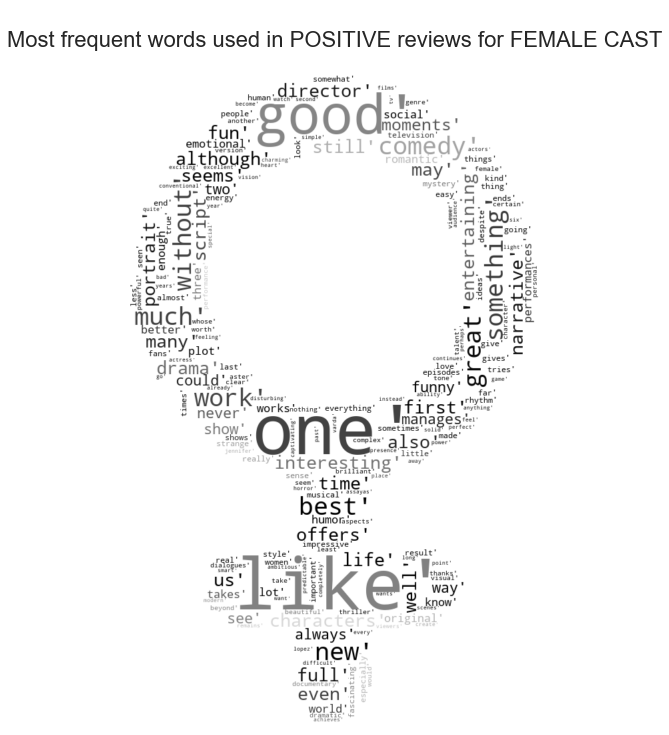

In [112]:
# Generate a word cloud image
mask = np.array(Image.open("/Users/gina/Documents/allWomen/Final project/female-icon-png-1.png"))
wordcloud_pos_women = WordCloud(stopwords=None, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(str(vocab4.most_common(200)))

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[12,12])
plt.imshow(wordcloud_pos_women.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.title('\nMost frequent words used in POSITIVE reviews for FEMALE CAST\n', fontsize=22)

# store to file
plt.savefig("/Users/gina/Documents/allWomen/Final project/images/Sentiment Analysis/no stopwords data/fig13.png", format="png")

plt.show()

In [113]:
# top words in reviews

from collections import Counter

vocab5 = Counter()
for review in df_pos.Clean_Reviews[df_pos.Most_Common_Gender_Cast == 'Men']:
    for word in review.split(' '):
        vocab5[word] += 1

vocab5.most_common(20)

[('one', 753),
 ('good', 647),
 ('like', 632),
 ('best', 556),
 ('great', 501),
 ('much', 488),
 ('without', 452),
 ('new', 425),
 ('first', 413),
 ('even', 406),
 ('also', 403),
 ('well', 401),
 ('work', 400),
 ('characters', 397),
 ('time', 393),
 ('although', 383),
 ('action', 360),
 ('entertaining', 359),
 ('comedy', 344),
 ('interesting', 332)]

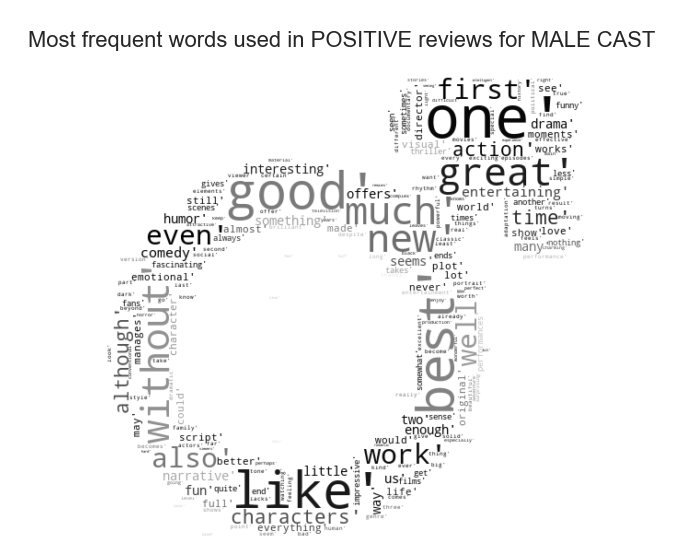

In [114]:
# Generate a word cloud image
mask = np.array(Image.open("/Users/gina/Documents/allWomen/Final project/4-43990_open-male-symbol-png-clipart.jpg"))
wordcloud_pos_men = WordCloud(stopwords=None, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(str(vocab5.most_common(200)))

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[12,12])
plt.imshow(wordcloud_pos_men.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.title('\nMost frequent words used in POSITIVE reviews for MALE CAST\n', fontsize=22)

# store to file
plt.savefig("/Users/gina/Documents/allWomen/Final project/images/Sentiment Analysis/no stopwords data/fig14.png", format="png")

plt.show()

In [115]:
# top words in reviews

from collections import Counter

vocab6 = Counter()
for review in df_neg.Clean_Reviews[df_neg.Most_Common_Gender_Cast == 'Women']:
    for word in review.split(' '):
        vocab6[word] += 1

vocab6.most_common(20)

[('much', 7),
 ('many', 7),
 ('little', 7),
 ('first', 6),
 ('good', 5),
 ('portrait', 5),
 ('made', 4),
 ('seems', 4),
 ('documentary', 4),
 ('takes', 4),
 ('entertaining', 4),
 ('lot', 4),
 ('bad', 3),
 ('social', 3),
 ('script', 3),
 ('one', 3),
 ('violence', 3),
 ('get', 3),
 ('scenes', 3),
 ('director', 3)]

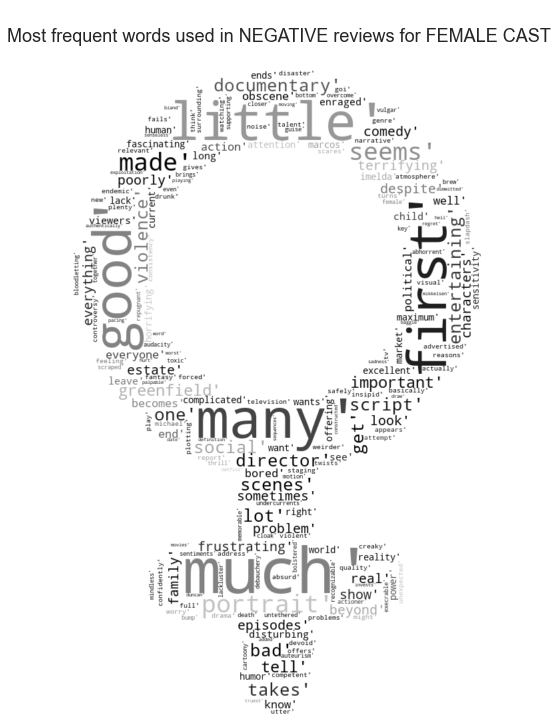

In [116]:
# Generate a word cloud image
mask = np.array(Image.open("/Users/gina/Documents/allWomen/Final project/female-icon-png-1.png"))
wordcloud_pos_women = WordCloud(stopwords=None, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(str(vocab6.most_common(200)))

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[12,12])
plt.imshow(wordcloud_pos_women.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.title('\nMost frequent words used in NEGATIVE reviews for FEMALE CAST\n', fontsize=18)

# store to file
plt.savefig("/Users/gina/Documents/allWomen/Final project/images/Sentiment Analysis/no stopwords data/fig15.png", format="png")

plt.show()

In [117]:
# top words in reviews

from collections import Counter

vocab7 = Counter()
for review in df_neg.Clean_Reviews[df_neg.Most_Common_Gender_Cast == 'Men']:
    for word in review.split(' '):
        vocab7[word] += 1

vocab7.most_common(20)

[('one', 56),
 ('horror', 56),
 ('much', 52),
 ('like', 47),
 ('even', 45),
 ('first', 43),
 ('time', 39),
 ('little', 38),
 ('although', 38),
 ('also', 37),
 ('us', 37),
 ('characters', 37),
 ('without', 36),
 ('work', 36),
 ('bad', 35),
 ('good', 34),
 ('action', 34),
 ('new', 31),
 ('offers', 29),
 ('something', 29)]

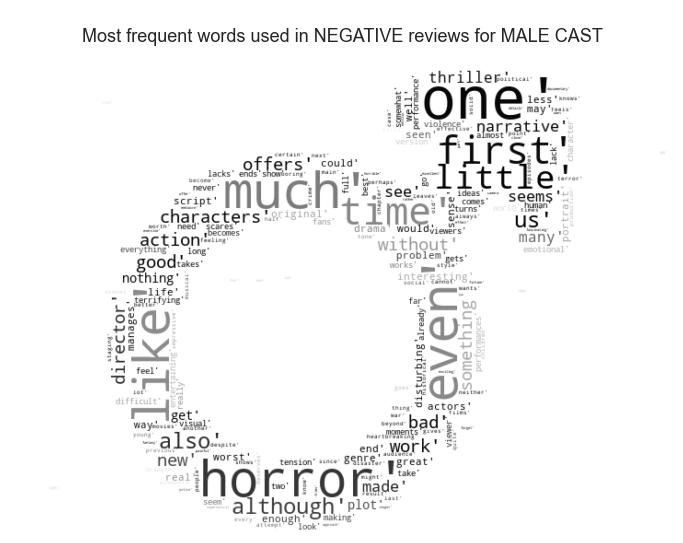

In [118]:
# Generate a word cloud image
mask = np.array(Image.open("/Users/gina/Documents/allWomen/Final project/4-43990_open-male-symbol-png-clipart.jpg"))
wordcloud_pos_men = WordCloud(stopwords=None, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(str(vocab7.most_common(200)))

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[12,12])
plt.imshow(wordcloud_pos_men.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.title('\nMost frequent words used in NEGATIVE reviews for MALE CAST\n', fontsize=18)

# store to file
plt.savefig("/Users/gina/Documents/allWomen/Final project/images/Sentiment Analysis/no stopwords data/fig16.png", format="png")

plt.show()

## Checking most frequent words: part II

In this case, I checked the most common words by taking into account only nouns and adjectives. To accomplish that, I applied the Name Entry Recognition function from nltk library.

In [119]:
def preprocess(text):
    text = nltk.word_tokenize(text)
    text = nltk.pos_tag(text)
    return text

In [120]:
%%time

dataset['NER_Reviews'] = dataset['Clean_Reviews'].apply(preprocess)

CPU times: user 8.85 s, sys: 72.2 ms, total: 8.92 s
Wall time: 8.93 s


In [121]:
dataset.head(2)

,Title,Reviews,Most_Common_Gender_Cast,Most_Common_Gender_Directors,Clean_Reviews,Neg_Sentiment,Neu_Sentiment,Pos_Sentiment,Sentiment_Compound,NER_Reviews
0,Money Heist,"""[4th Season Review]: [It] is like an extended...",Men,Men,like extended heist except gets pacier every p...,0.074,0.531,0.394,0.9819,"[(like, IN), (extended, VBN), (heist, NN), (ex..."
1,The Blacklist,"""His name is above the title and, depending ho...",Men,Men,name title depending feel james may become fav...,0.022,0.688,0.289,0.9400,"[(name, NN), (title, NN), (depending, VBG), (f..."


In [122]:
for item in dataset.index:
    words = []
    for i in dataset['NER_Reviews'].iloc[item]:
        if i[1] == 'JJ':
            words.append(i[0])
        elif i[1] == 'NN':
            words.append(i[0])
    
    dataset['NER_Reviews'].iloc[item] = ' '.join(words)

In [123]:
dataset.head(2)

,Title,Reviews,Most_Common_Gender_Cast,Most_Common_Gender_Directors,Clean_Reviews,Neg_Sentiment,Neu_Sentiment,Pos_Sentiment,Sentiment_Compound,NER_Reviews
0,Money Heist,"""[4th Season Review]: [It] is like an extended...",Men,Men,like extended heist except gets pacier every p...,0.074,0.531,0.394,0.9819,heist peerless good start pace early tension l...
1,The Blacklist,"""His name is above the title and, depending ho...",Men,Men,name title depending feel james may become fav...,0.022,0.688,0.289,0.9400,name title feel favorite fall pilot stylish pl...


In [124]:
# full dataframe with POSITIVE comments
df_pos2 = dataset.loc[dataset.Sentiment_Compound >= 0.90]

In [125]:
# full dataframe with NEGATIVE comments
df_neg2 = dataset.loc[dataset.Sentiment_Compound < 0.0]

In [126]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfdif_vectorizer_pos = TfidfVectorizer(stop_words = 'english')
X_tfidf_pos = tfdif_vectorizer_pos.fit_transform(df_pos2["NER_Reviews"])

X_tfidf_pos.shape

(951, 9333)

In [127]:
tfdif_vectorizer_pos.vocabulary_

{'heist': 3752,
 'peerless': 6073,
 'good': 3497,
 'start': 7861,
 'pace': 5916,
 'early': 2475,
 'tension': 8273,
 'time': 8368,
 'aka': 197,
 'casa': 1151,
 'current': 1889,
 'thriller': 8340,
 'visual': 9026,
 'panache': 5947,
 'freaky': 3247,
 'dalí': 1917,
 'thrive': 8341,
 'ensemble': 2669,
 'kind': 4646,
 'wit': 9222,
 'humor': 3915,
 'colorful': 1459,
 'suspense': 8113,
 'inventive': 4383,
 'storyline': 7925,
 'claustrophobic': 1361,
 'atmosphere': 513,
 'glorious': 3469,
 'title': 8393,
 'feel': 3000,
 'favorite': 2987,
 'fall': 2929,
 'pilot': 6202,
 'stylish': 7987,
 'plot': 6261,
 'lot': 4962,
 'motivation': 5494,
 'thrown': 8349,
 'couple': 1786,
 'interesting': 4321,
 'sort': 7726,
 'think': 8320,
 'situation': 7576,
 'lofty': 4931,
 'narrative': 5570,
 'nail': 5553,
 'twist': 8592,
 'loved': 4973,
 'german': 3416,
 'addictive': 101,
 'existential': 2813,
 'playground': 6244,
 'venture': 8939,
 'baran': 637,
 'bo': 832,
 'odar': 5774,
 'jantje': 4476,
 'friese': 3274,
 'r

In [128]:
negStopWords = nltk.corpus.stopwords.words('english')
newStopWords3 = ['good']
negStopWords.extend(newStopWords3)

In [129]:
tfdif_vectorizer_neg = TfidfVectorizer(stop_words = negStopWords)
X_tfidf_neg = tfdif_vectorizer_neg.fit_transform(df_neg2["NER_Reviews"])

X_tfidf_neg.shape

(180, 2612)

In [130]:
tfdif_vectorizer_neg.vocabulary_

{'worthwhile': 2596,
 'piece': 1713,
 'painful': 1661,
 'tale': 2289,
 'sexual': 2053,
 'legal': 1354,
 'failure': 833,
 'excellent': 789,
 'job': 1280,
 'portrait': 1747,
 'doc': 645,
 'certain': 318,
 'level': 1359,
 'engagement': 737,
 'depend': 575,
 'much': 1527,
 'stomach': 2203,
 'netflix': 1566,
 'helplessness': 1063,
 'time': 2345,
 'mediocre': 1458,
 'told': 2353,
 'epstein': 755,
 'single': 2093,
 'brave': 244,
 'camera': 280,
 'courage': 476,
 'shape': 2059,
 'filthy': 880,
 'documentary': 650,
 'highlighting': 1074,
 'mood': 1515,
 'spanish': 2154,
 'camp': 283,
 'soapy': 2123,
 'striptease': 2217,
 'feel': 863,
 'shame': 2057,
 'show': 2072,
 'discern': 622,
 'gravity': 1006,
 'fact': 831,
 'fiction': 869,
 'unilluminating': 2457,
 'mexican': 1481,
 'political': 1738,
 'answer': 89,
 'comment': 401,
 'idea': 1123,
 'mexico': 1482,
 'state': 2196,
 'scandal': 2001,
 'war': 2546,
 'first': 888,
 'action': 22,
 'interplay': 1239,
 'team': 2302,
 'plot': 1728,
 'hidden': 1071

In [131]:
pos_topwords_women_cast = most_frequent_words(df_pos.Clean_Reviews[df_pos.Most_Common_Gender_Cast == 'Women'], tfdif_vectorizer_pos.vocabulary_, 20)
pos_topwords_men_cast = most_frequent_words(df_pos.Clean_Reviews[df_pos.Most_Common_Gender_Cast == 'Men'], tfdif_vectorizer_pos.vocabulary_, 20)
neg_topwords_women_cast = most_frequent_words(df_neg.Clean_Reviews[df_neg.Most_Common_Gender_Cast == 'Women'], tfdif_vectorizer_neg.vocabulary_, 20)
neg_topwords_men_cast = most_frequent_words(df_neg.Clean_Reviews[df_neg.Most_Common_Gender_Cast == 'Men'], tfdif_vectorizer_neg.vocabulary_, 20)

In [132]:
neg_topwords_women_cast

[('much', 7),
 ('many', 7),
 ('little', 7),
 ('first', 6),
 ('portrait', 5),
 ('documentary', 4),
 ('entertaining', 4),
 ('lot', 4),
 ('bad', 3),
 ('social', 3),
 ('script', 3),
 ('violence', 3),
 ('get', 3),
 ('director', 3),
 ('greenfield', 3),
 ('important', 3),
 ('frustrating', 3),
 ('terrifying', 3),
 ('look', 3),
 ('real', 3)]

In [133]:
words = []
word_count = []

for item in pos_topwords_women_cast:
    words.append(item[0])
    word_count.append(item[1])

In [134]:
words.reverse()
word_count.reverse()

In [135]:
import plotly.graph_objects as go

colors = ['lightslategray',] * 20
colors[5] = 'green'

trace_1 = go.Bar(
    x=word_count,
    y=words,
    opacity = 0.6,
    name = 'Women',
    marker_color = colors,
    orientation='h'
)

traces = [trace_1]
layout = go.Layout(barmode='overlay',
                   title='Top 20 most frequent words used in POSITIVE reviews for FEMALE CAST',
                   xaxis=dict( title='Count'),
                   paper_bgcolor='white',
                   uniformtext_minsize=1, 
                   uniformtext_mode='show',
                   autosize=False,
                   width=800,
                   height=500,
)

fig1 = go.Figure(data=traces, layout=layout)
iplot(fig1)

#https://plotly.com/python/static-image-export/
#fig1.write_image("/Users/gina/Documents/allWomen/Final project/images/Sentiment Analysis/fig5.png")
#https://plotly.com/python/interactive-html-export/
fig1.write_html("/Users/gina/Documents/allWomen/Final project/images/Sentiment Analysis/no stopwords data/fig9.1.html")
fig1.write_image("/Users/gina/Documents/allWomen/Final project/images/Sentiment Analysis/no stopwords data/fig9.1.svg")

In [67]:
words = []
word_count = []

for item in pos_topwords_men_cast:
    words.append(item[0])
    word_count.append(item[1])

In [68]:
words.reverse()
word_count.reverse()

In [69]:
import plotly.graph_objects as go

trace_1 = go.Bar(
    x=word_count,
    y=words,
    opacity = 0.6,
    name = 'Men',
    marker_color = 'green',
    orientation='h'
)

traces = [trace_1]
layout = go.Layout(barmode='overlay',
                   title='Top 20 most frequent words used in POSITIVE reviews for MALE CAST',
                   xaxis=dict( title='Count'),
                   paper_bgcolor='white',
                   uniformtext_minsize=1, 
                   uniformtext_mode='show',
                   autosize=False,
                   width=800,
                   height=500,
)

fig1 = go.Figure(data=traces, layout=layout)
iplot(fig1)

#https://plotly.com/python/static-image-export/
#fig1.write_image("/Users/gina/Documents/allWomen/Final project/images/Sentiment Analysis/fig5.png")
#https://plotly.com/python/interactive-html-export/
fig1.write_html("/Users/gina/Documents/allWomen/Final project/images/Sentiment Analysis/no stopwords data/fig10.1.html")
fig1.write_image("/Users/gina/Documents/allWomen/Final project/images/Sentiment Analysis/no stopwords data/fig10.1.svg")

In [70]:
words = []
word_count = []

for item in neg_topwords_women_cast:
    words.append(item[0])
    word_count.append(item[1])

In [71]:
words.reverse()
word_count.reverse()

In [73]:
import plotly.graph_objects as go

trace_1 = go.Bar(
    x=word_count,
    y=words,
    opacity = 0.6,
    marker_color = 'red',
    orientation='h'
)

traces = [trace_1]
layout = go.Layout(barmode='overlay',
                   title='Top 20 most frequent words used in NEGATIVE reviews for FEMALE CAST',
                   xaxis=dict( title='Count'),
                   paper_bgcolor='white',
                   uniformtext_minsize=1, 
                   uniformtext_mode='show',
                   autosize=False,
                   width=800,
                   height=500,
)

fig1 = go.Figure(data=traces, layout=layout)
iplot(fig1)

#https://plotly.com/python/static-image-export/
#fig1.write_image("/Users/gina/Documents/allWomen/Final project/images/Sentiment Analysis/fig5.png")
#https://plotly.com/python/interactive-html-export/
fig1.write_html("/Users/gina/Documents/allWomen/Final project/images/Sentiment Analysis/no stopwords data/fig11.1.html")
fig1.write_image("/Users/gina/Documents/allWomen/Final project/images/Sentiment Analysis/no stopwords data/fig11.1.svg")

In [74]:
words = []
word_count = []

for item in neg_topwords_men_cast:
    words.append(item[0])
    word_count.append(item[1])

In [75]:
words.reverse()
word_count.reverse()

In [76]:
import plotly.graph_objects as go

trace_1 = go.Bar(
    x=word_count,
    y=words,
    opacity = 0.6,
    marker_color = 'red',
    orientation='h'
)

traces = [trace_1]
layout = go.Layout(barmode='overlay',
                   title='Top 20 most frequent words used in NEGATIVE reviews for MALE CAST',
                   xaxis=dict( title='Count'),
                   paper_bgcolor='white',
                   uniformtext_minsize=1, 
                   uniformtext_mode='show',
                   autosize=False,
                   width=800,
                   height=500,
)

fig1 = go.Figure(data=traces, layout=layout)
iplot(fig1)

#https://plotly.com/python/static-image-export/
#fig1.write_image("/Users/gina/Documents/allWomen/Final project/images/Sentiment Analysis/fig5.png")
#https://plotly.com/python/interactive-html-export/
fig1.write_html("/Users/gina/Documents/allWomen/Final project/images/Sentiment Analysis/no stopwords data/fig12.1.html")
fig1.write_image("/Users/gina/Documents/allWomen/Final project/images/Sentiment Analysis/no stopwords data/fig12.1.svg")

In [88]:
# top words in reviews

from collections import Counter

vocab8 = Counter()
for review in df_pos2.NER_Reviews[df_pos2.Most_Common_Gender_Cast == 'Women']:
    for word in review.split(' '):
        vocab8[word] += 1

vocab8.most_common(20)

[('good', 57),
 ('comedy', 51),
 ('new', 49),
 ('great', 47),
 ('something', 46),
 ('work', 42),
 ('much', 36),
 ('many', 35),
 ('drama', 34),
 ('time', 32),
 ('director', 32),
 ('full', 31),
 ('narrative', 30),
 ('life', 29),
 ('portrait', 26),
 ('fun', 25),
 ('first', 25),
 ('way', 24),
 ('original', 24),
 ('funny', 23)]

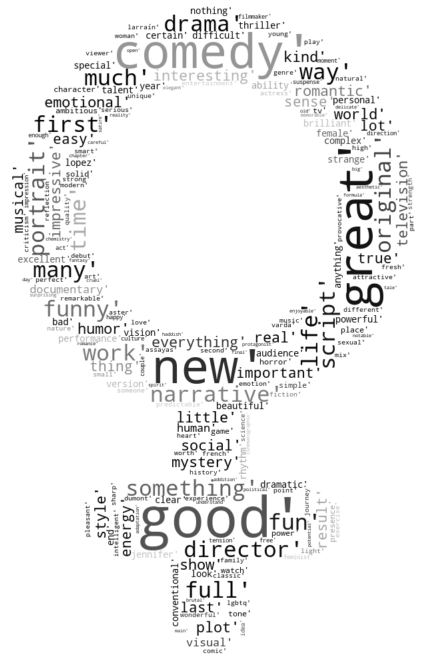

In [89]:
# Generate a word cloud image
mask = np.array(Image.open("/Users/gina/Documents/allWomen/Final project/female-icon-png-1.png"))
wordcloud_pos_women = WordCloud(stopwords=None, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(str(vocab8.most_common(200)))

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[12,12])
plt.imshow(wordcloud_pos_women.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
#plt.title('\nMost frequent words used in POSITIVE reviews for FEMALE CAST\n', fontsize=22)

# store to file
plt.savefig("/Users/gina/Documents/allWomen/Final project/images/Sentiment Analysis/no stopwords data/fig13.1.svg", format="svg")

plt.show()

In [90]:
# top words in reviews

from collections import Counter

vocab9 = Counter()
for review in df_pos2.NER_Reviews[df_pos2.Most_Common_Gender_Cast == 'Men']:
    for word in review.split(' '):
        vocab9[word] += 1

vocab9.most_common(20)

[('good', 640),
 ('great', 501),
 ('new', 425),
 ('time', 393),
 ('action', 360),
 ('work', 337),
 ('much', 333),
 ('comedy', 331),
 ('many', 321),
 ('something', 314),
 ('way', 293),
 ('drama', 279),
 ('little', 278),
 ('fun', 251),
 ('narrative', 248),
 ('everything', 240),
 ('director', 239),
 ('humor', 234),
 ('emotional', 234),
 ('full', 221)]

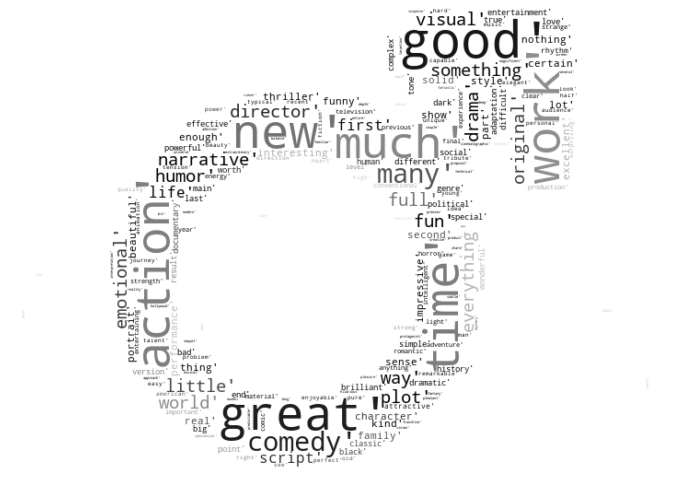

In [91]:
# Generate a word cloud image
mask = np.array(Image.open("/Users/gina/Documents/allWomen/Final project/4-43990_open-male-symbol-png-clipart.jpg"))
wordcloud_pos_men = WordCloud(stopwords=None, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(str(vocab9.most_common(200)))

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[12,12])
plt.imshow(wordcloud_pos_men.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
#plt.title('\nMost frequent words used in POSITIVE reviews for MALE CAST\n', fontsize=22)

# store to file
plt.savefig("/Users/gina/Documents/allWomen/Final project/images/Sentiment Analysis/no stopwords data/fig14.1.svg", format="svg")

plt.show()

In [92]:
# top words in reviews

from collections import Counter

vocab10 = Counter()
for review in df_neg2.NER_Reviews[df_neg2.Most_Common_Gender_Cast == 'Women']:
    for word in review.split(' '):
        vocab10[word] += 1

vocab10.most_common(20)

[('many', 7),
 ('little', 7),
 ('good', 5),
 ('portrait', 5),
 ('much', 4),
 ('documentary', 4),
 ('lot', 4),
 ('bad', 3),
 ('social', 3),
 ('script', 3),
 ('violence', 3),
 ('director', 3),
 ('greenfield', 3),
 ('important', 3),
 ('look', 3),
 ('real', 3),
 ('estate', 3),
 ('first', 3),
 ('everything', 3),
 ('comedy', 2)]

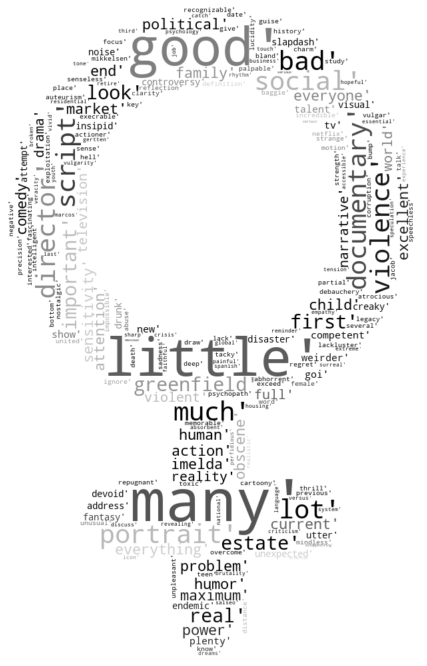

In [93]:
# Generate a word cloud image
mask = np.array(Image.open("/Users/gina/Documents/allWomen/Final project/female-icon-png-1.png"))
wordcloud_pos_women = WordCloud(stopwords=None, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(str(vocab10.most_common(200)))

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[12,12])
plt.imshow(wordcloud_pos_women.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
#plt.title('\nMost frequent words used in NEGATIVE reviews for FEMALE CAST\n', fontsize=18)

# store to file
plt.savefig("/Users/gina/Documents/allWomen/Final project/images/Sentiment Analysis/no stopwords data/fig15.1.svg", format="svg")

plt.show()

In [94]:
# top words in reviews

from collections import Counter

vocab11 = Counter()
for review in df_neg2.NER_Reviews[df_neg2.Most_Common_Gender_Cast == 'Men']:
    for word in review.split(' '):
        vocab11[word] += 1

vocab11.most_common(20)

[('horror', 53),
 ('time', 39),
 ('little', 35),
 ('bad', 35),
 ('action', 34),
 ('good', 33),
 ('work', 33),
 ('much', 32),
 ('new', 31),
 ('something', 29),
 ('director', 29),
 ('narrative', 28),
 ('many', 26),
 ('nothing', 26),
 ('thriller', 25),
 ('drama', 24),
 ('original', 24),
 ('plot', 23),
 ('script', 22),
 ('life', 21)]

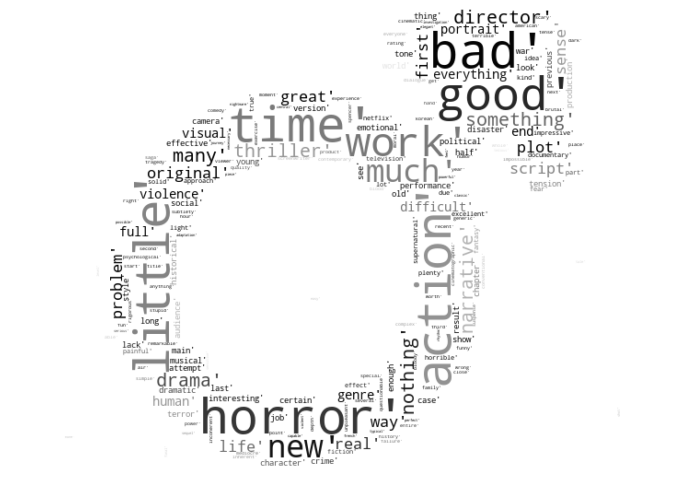

In [95]:
# Generate a word cloud image
mask = np.array(Image.open("/Users/gina/Documents/allWomen/Final project/4-43990_open-male-symbol-png-clipart.jpg"))
wordcloud_pos_men = WordCloud(stopwords=None, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(str(vocab11.most_common(200)))

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[12,12])
plt.imshow(wordcloud_pos_men.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
#plt.title('\nMost frequent words used in NEGATIVE reviews for MALE CAST\n', fontsize=18)

# store to file
plt.savefig("/Users/gina/Documents/allWomen/Final project/images/Sentiment Analysis/no stopwords data/fig16.1.svg", format="svg")

plt.show()